#MCI AI and Machine Learning For Begineer - Topic: Classification --Le Duyc Anh - 4/6/2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Logistic Regression

##Theory

<h1>SELF EXPLAINATORY</h1>

so in database in d-dimension, we got $X_i = [x_1, x_2,...,x_n]∈R^{d×K}$ and for each points in that dimensions has a lot of factors that made it way, and in a classification of chances that is calculated with such factors. For instance, when calculating a factors that causes a student to fail his exams, we got "study/not study", "errands/no errands"... each of the sectors have points given like study = 1 -> no study = 0 and there can be values between 1 and 0 to indicate the studying frequencies for instance. And to calculate the whole, we can use multiplicity for each factors, like $ P(studying).P(errands) = y $ the product y then can dictate wheather the student can success or fail their test based on probabilities created from the multiplicity. like if it close to 1 -> chance to success is more closer to 100%, and vice versa.

this shit is like the mathematical

$$
P(y^i|x^i,θ) = (ŷ^i)^{y^t}(1-ŷ^i)^{(1-y^t)}
$$

We need to find the Θ to maximize the value of above function and this Θ called an ***optimal point***
$$
θ^* = arg\max_ΘP(y|X,θ)
$$

<h1> Logistic Regression - Binary Cross Entropy Loss and Gradient Descent

In logistic regression, we have 2 classes, so we use the **Binary Cross Entropy** loss function.

---

<h1> 🔹 Binary Cross Entropy Loss

Every value $\hat{y}^i$ or $1 - \hat{y}^i$ is lower than 1.  
Product of many such values can cause **numerical underflow**, so we take logarithms and sum the terms.

We define the **cross entropy loss** as:

$$
\mathcal{L}(\theta) = - \log P(y | X, \theta)
= - \left( y \log \hat{y} + (1 - y)\log(1 - \hat{y}) \right)
$$

For all $m$ samples:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^{m} \left( y^i \log \hat{y}^i + (1 - y^i)\log(1 - \hat{y}^i) \right)
$$

---

<h1> 🔹 Optimization Objective

Instead of maximizing the log-likelihood:

$$
\theta^* = \arg\max_{\theta} P(y | X, \theta)
$$

We minimize the negative log-likelihood:

$$
\theta^* = \arg\min_{\theta} - \log P(y | X, \theta)
$$

---

<h1> 🔹 Derivative of Loss

We use the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial \theta} =
\frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot
\frac{\partial \hat{y}}{\partial \sigma} \cdot
\frac{\partial \sigma}{\partial \theta}
$$

Where:

 $$\hat{y} = \sigma(s)$$  
 $$\sigma(s) = \frac{1}{1 + e^{-s}}$$  
 $$\sigma'(s) = \sigma(s)(1 - \sigma(s))$$

Then:

$$
\frac{\partial \sigma}{\partial \theta} = \hat{y}(1 - \hat{y}) X
$$


and:

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} =
\frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
$$

Thus:

$$
\frac{\partial \mathcal{L}}{\partial \theta}
= (\hat{y} - y) X
$$

---

<h1> 🔹 Stochastic Gradient Descent (SGD)

For each sample $(x^i, y^i)$:

$$
\frac{\partial \mathcal{L}(\theta, x^i, y^i)}{\partial \theta} = (\hat{y}^i - y^i)x^i
$$

<h1> Update Rule:

$$
\theta = \theta - \eta (\hat{y}^i - y^i)x^i
$$

Where:
- $\eta$ is the learning rate



##Testing with python library sklearn LogisticRegression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df = iris_df.drop(columns=['petal_length', 'petal_width'])
iris_df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [ ]:
iris_df['is_setosa'] = iris_df.species.apply(lambda x: True if x == 'setosa' else False)
iris_df

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True
...,...,...,...,...
145,6.7,3.0,virginica,False
146,6.3,2.5,virginica,False
147,6.5,3.0,virginica,False
148,6.2,3.4,virginica,False


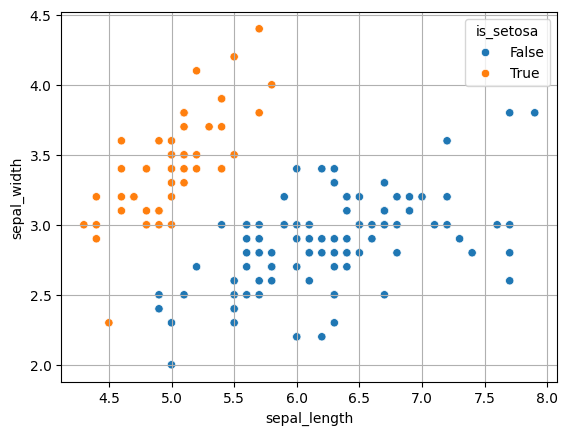

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='is_setosa');
plt.grid(True)

[[-3.38828053  3.1645602 ]]


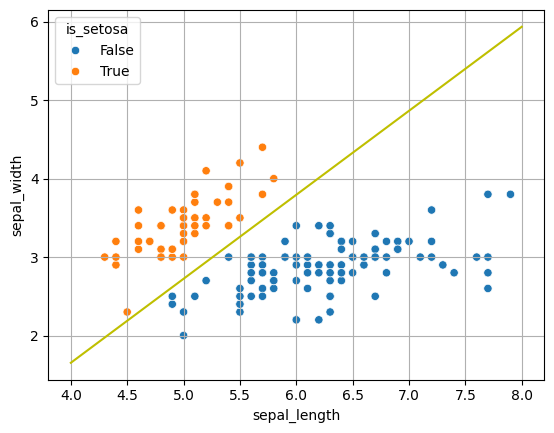

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

sklearn_logistic_regression_model = LogisticRegression(fit_intercept=True)
sklearn_logistic_regression_model.fit(x,y)
print(sklearn_logistic_regression_model.coef_)

w = sklearn_logistic_regression_model.coef_

w_0 = sklearn_logistic_regression_model.intercept_
w_1 = w[0][0]
w_2 = w[0][1]

sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='is_setosa')
plt.grid(True)
plt.plot()
sepal_length = np.linspace(4,8,2)
sepal_width = -w_0/w_2 + (-w_1/w_2)*sepal_length

plt.plot(sepal_length, sepal_width, "y")
plt.show()

$$w_1x_1 + w_2x_2 + w_o = 0$$
$$w_2x_2 = -w_1x_1 -w_o$$
so this is what the equation up there actually means
$$x_2 = -\frac{w_o}{w_2} - \frac{w_1}{w_2}x_1$$

with x_2 as the width and the x_1 as the length

In [ ]:
print(w_0[0], w_1, w_2)

8.323154867279907 -3.388280531554598 3.1645602042693364


meaning the borderline to be described as:

$$
y = -3.3882x_1 + 3.1646x_2 + 8.3232
$$


In [ ]:
w #this just means that the border between the two territory are represented by this line


array([[-3.38828053,  3.1645602 ]])

In [ ]:
x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

y_predict = sklearn_logistic_regression_model.predict(x)
y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
sklearn_logistic_regression_model.predict(np.array([[5,5]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
sklearn_logistic_regression_model.predict(np.array( [ [5,5] , [90,10] ] ) )
#this is like, inside the predict() we got the np.array to specify
#the input as an array, and then inside there is a list of values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True, False])

In [ ]:
#probablity estimates
sklearn_logistic_regression_model.predict_proba(np.array([[7,3.5]]))
#this has been integrated with sigmoid already.

#this means that the probability for the first class is 98% of confidence
#while the others are 1.3% confidence.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98685975, 0.01314025]])

to increase accuracy, we can utilize sigmoid function:

$$
σ(z) = \frac{1}{1 + e^{-z}}
$$

In [ ]:
def sigmoid_function(z):
  return 1/(1 + np.exp(-z))

x = np.array([[1,7,3.5]])
w = np.array([w_0[0], w_1, w_2])
#W.X = y

print(x)
print(w.flatten())

print(x.dot(w.flatten()))#this means y, finding the mutiplication of
#W.X with x to be verticle matrix, w a horizontal
#for the first x to multiply the first w and adding the products of the
#rest x(s) (of course the first x must be 1 since it is the w_0 afterall)
#the rest x_1 and x_2 must be different, but the supposed "x_0" must = 1
print(sigmoid_function(x.dot(w.flatten()))) #this means y after sigmoid
#propability to be the "True" territory, the "False" territory would be
# 1- this current probablity
print(1- sigmoid_function(x.dot(w.flatten()))) #98% of The False side

[[1.  7.  3.5]]
[ 8.32315487 -3.38828053  3.1645602 ]
[-4.31884814]
[0.01314025]
[0.98685975]


##Accuracy

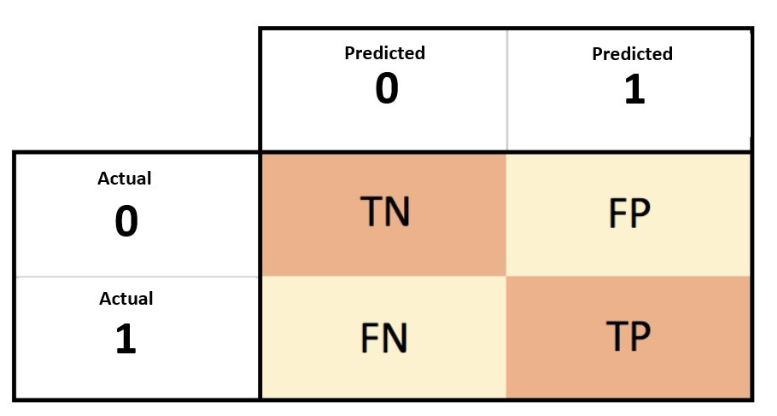

$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$
Accuracy is a valid choice of model precision evaluation for classification problems which are well-balanced and not skewed or No class imbalance

Accuracy is the proportion of true resylts among the total number of cases examined

Or it representing the ***overall correctness*** of the model's predictions

---
$$
Precision = \frac{TP}{TP + FP}
$$
Precision is a valid choice of evaluation metric when we want to be cery syre of our prediction

Precision, which answers the following question: What proportion of predicted Positive is truely Positive

measures the model's abiliy to ***correctly predict the posiive class***, it is useful when the cost of alse positives is high.

---

$$
Recall = \frac{TP}{TP + FN}
$$

Recall is a valid choice of evaluation metric when we want to capture as many postives as possible

Recall, which answers a different questions: what proportion of actual Positives is correctly classified

Recall quaiifies ***the model's ability to correctly identify*** the positive class instances.


---

$$
Specificity = \frac{TN}{TN + FP}
$$

 Specificity measures the model's ability to correctly identify the negative class instances.

 specificity is important when the cost of FN is high

---


***Key words***, negative here do not stands for the value, it stands for the true false or the boolean results of the output. The True and False one are the one which represents the wrongly putted points. Or data points that is misrepresented, like being True but given False, and vice versa.


**True Positive** $(TP)$: stands the amount the model predicted the positive class correctly.

**True Negative** $(NP)$: stands the amount the model predicted the negative class correctively

**False Positive** $(FP)$: meaning the model predicted the positive class incorrectly.

**False Negative** $(FN)$: meaning that the model predicted the negative class incorrectly.

From all that, we can evaluate the F1 score, which is a number between 0 and 1 and it is the harmonic mean of precision and recall

**The F1 score sort of maintains a balance between the precision and recall for the classifier. If the prcision is low, then the F1 is low and also the recall is low than the F1 score is low too**


$$
F1 = \frac{2}{\frac{1}{precision} + \frac{1}{Recall}}
$$

$$-> F1 = 2*\frac{Precision * Recall}{precision + Recall}$$





In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

In [ ]:
x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

y_predicted = sklearn_logistic_regression_model.predict(x)

print(classification_report( y, y_predicted))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       100
        True       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# 2. K-means Clustering

in K-clustering algroithm, we have various of clusters of data that we have no labels for each data. To put it simply, the goals of utilizing K-means Clustering is to devide and classify data into different clusters, as the data in a clusters has a specific closeness.
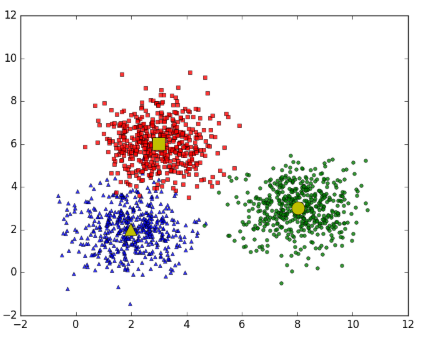

The main ideas of clustering is to aggregate the points that sits next to each others in a specific space. (this space can have various dimensions of circumstances and informations about a incredibly huge datasets)

from the previous example, it shows an example of a 3 clusters of data.

given that every clusters has a representative point, a center (indicating in yellow). And the points around each centers related to the same group with those center.

Basically, set a center point, and we see if random other points are really close to it or not

For instance, if we got 5 islands on a area of water, as the center, and a random ass points inside the Oxy table, it will calculated the distance of each points and then will follow the smallest distance.

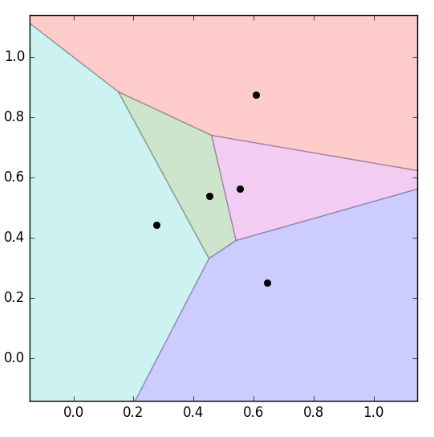

in mathematics, this is called the Voronoi Diagram, which is a partition of a plain into regions CLOSE TO EACH OF A GIVEN SET OF OBJECT.

For 3 or more dimensions, like for planets, each planets will be considered as each points. Or it also can be called as: HYPERPOLYGON


Statistically thinking, so how can i indicate which points it should follows, basically for each random ass $x_i$ have $y_i = [ y_{i1},y_{i1},y_{i2},...,y_{iK}]∈
R^{ d × K}$ as the label vector, each $Y_i$ indicates each center points, with K is the amount of clusters/center points we want to enumerate.

when $x_i$ follows the cluster 1, the rest is = 0 but $y_{i1}$, so do when it follows the clusters 2, and so on, applying for each points



##Mathematical Theories

<h1>Loss Function and Optimization Problem</h1>

If we consider **mₖ** as the center (or representative) of each cluster and _assume_ that all data points are assigned to a cluster by **mₖ**, then the error for assigning a data point **xᵢ** to cluster **k** is the distance:


***disclaimer***

### Are $\mathbf{x}$ and $\mathbf{m}$ Just on the $x$-Axis (Ox Line)?

No — in the context of K-means clustering, both $\mathbf{x}$ and $\mathbf{m}$ are **vectors**, not just scalar values on the $x$-axis.

---

#### Specifically:

- $\mathbf{x}_i \in \mathbb{R}^d$ is a **data point vector**.  
  Example: If $d = 2$, then $\mathbf{x}_i = (x_i^{(1)}, x_i^{(2)}) = (x, y)$

- $\mathbf{m}_k \in \mathbb{R}^d$ is the **cluster center vector** for cluster $k$, same dimension as $\mathbf{x}_i$.

---

#### Example in 2D:

If your data is in 2D space, then:

- $\mathbf{x}_i = (x_i^{(1)}, x_i^{(2)})$
- $\mathbf{m}_k = (m_k^{(1)}, m_k^{(2)})$

Then the squared Euclidean distance is:

$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2 = (x_i^{(1)} - m_k^{(1)})^2 + (x_i^{(2)} - m_k^{(2)})^2
$$

So this measures the **full geometric distance** between a data point and a cluster center in $d$-dimensional space — **not** just along the $x$-axis.



$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2
$$

We want this error to be as small as possible, so we aim to minimize the following quantity:

$$
\| \mathbf{x}_i - \mathbf{m}_k \|_2^2
$$

Moreover, since **xᵢ** is assigned to cluster **k**, we have:

$$
y_{ik} = 1, \quad y_{ij} = 0, \quad \forall j \ne k
$$

Then, the expression above can be rewritten as:

$$
y_{ik} \| \mathbf{x}_i - \mathbf{m}_k \|_2^2 = \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2
$$


The total loss for the dataset becomes:

$$
\mathcal{L}(\mathbf{Y}, \mathbf{M}) = \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2
$$

Where:

- **Y** = [ **y₁**, **y₂**, ..., **yₙ** ] is the label matrix.

In K-means, we assign each data point $x_i$ to one of 𝐾 clusters. Instead of just writing “this point belongs to cluster 2,” we often represent the assignment using a label matrix 𝑌.

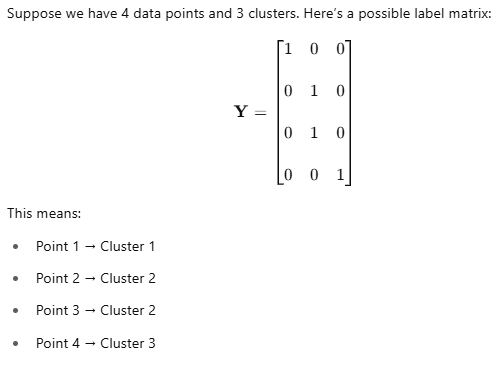

- **M** = [ **m₁**, **m₂**, ..., **mₖ** ] are the cluster centers.

This is the **loss function** in the K-means clustering problem: $\mathcal{L}(\mathbf{Y}, \mathbf{M})$ with the constraint described in equation (1).

To summarize, the optimization problem is:

$$
\mathbf{Y}, \mathbf{M} = \arg \min_{\mathbf{Y}, \mathbf{M}} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

subject to:

$$
y_{ij} \in \{0, 1\} \quad \forall i, j; \quad \sum_{j=1}^{K} y_{ij} = 1 \quad \forall i
$$


<h1> Found $Y$, find $M$ </h1>
Thus, for instance, when we have found all of the centers, which the M has been found, to find y, or find all the label vectors to let the loss function to reach its minimum solution

$$
\mathbf{y_i} = \arg \min_{\mathbf{{y_j}}} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

<h1>Found $M$, Find $Y$</h1>
when we have found the cluster for each points, find the new center for each clusters to make the loss function to be the smallest.

$$
m_j = \arg \min_{{m_j}} \sum_{t=1}^{N} \| \mathbf{x}_i - \mathbf{m}_j \|_2^2 \tag{2}
$$

Đặt \( l(\mathbf{m}_j) \) là hàm bên trong dấu \( \arg\min \), ta có đạo hàm:

$$
\frac{\partial l(\mathbf{m}_j)}{\partial \mathbf{m}_j} = 2 \sum_{i=1}^{N} y_{ij}(\mathbf{m}_j - \mathbf{x}_i)
$$

Giải phương trình đạo hàm bằng 0 ta có:

$$
\mathbf{m}_j \sum_{i=1}^{N} y_{ij} = \sum_{i=1}^{N} y_{ij} \mathbf{x}_i
$$

$$
\Rightarrow \mathbf{m}_j = \frac{\sum_{i=1}^{N} y_{ij} \mathbf{x}_i}{\sum_{i=1}^{N} y_{ij}}
$$



##K-mean Clustering Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn.cluster as cluster

In [ ]:
x,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

print(x[:5],y[:5])

fig = plt.figure(0)
plt.grid(True)
from matplotlib.colors import ListedColormap
plt.scatter(x[:,0],x[:,1], c=y, cmap = ListedColormap(["red", "blue", "green"]))
plt.show()

In [ ]:

clusters = {}
k=3
for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

plt.scatter(x[:,0],x[:,1], c=y, cmap = ListedColormap(["red", "blue", "green"]))
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'black')
plt.show()

#this is basically creates a random 3 points

In [ ]:
def distance(x_1, m_1):
  return np.sqrt(np.sum((x_1 - m_1)**2)) #Defining Euclidean distance


In [ ]:
clusters

In [ ]:
def assign_clusters(X, clusters):
    for index_per_x_points in range(X.shape[0]):
        dist = []

        curr_x = X[index_per_x_points] #take every points in X

        for i in range(k): #this would occurs for each points. each X points will be
        #given for each designated centers, with k=3 as of 3 centers
            dis = distance(curr_x, clusters[i]['center']) #find the distance between the current placement
            #and the related data
            dist.append(dis) #and the write down each of the distance inside the dist list
        curr_cluster = np.argmin(dist)#after the iterations of the 3 centers, find the one
        #that have the smallest distance
        clusters[curr_cluster]['points'].append(curr_x) #and then appending the points
        #into the clusters dictionaries.
    return clusters

print(assign_clusters(x, clusters))

In [ ]:
def update_X_clusters(X,clusters):
  for i in range(k): #appoint all of the centers.
    points = np.array(clusters[i]['points'])
    if points.shape[0]>0: #so this counts the amount of aggregated points in the
    #point :[] sector, just to make sure if ther eare no points there it could come
    #out as error, halting the progress
      new_center = points.mean(axis=0) # so this finds the new center by find only
      #the mean of the X of the whole points,
      clusters[i]['center'] = new_center #update the new X axis for the randomized center

      clusters[i]['points'] = []
  return clusters


print(update_clusters(x, clusters))



def update_Y_cluster_through_prediction(X,clusters): #this is basically the assign_cluster one
#but this update the Y clusters
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance( X[i], clusters[j]['center'] ))
    pred.append(np.argmin(dist))
  return pred

print(update_Y_cluster_through_prediction(x ,clusters))

In [ ]:
clusters = assign_clusters(x, clusters)
clusters = update_clusters(x, clusters)
new_y = update_Y_cluster_through_prediction(x ,clusters)

plt.scatter(x[:,0], x[:,1], c=new_y, cmap = ListedColormap(["red", "pink", "green"]))

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^', c = 'black')
plt.grid(True)
plt.show()

#Naive_bayes: GausianNB

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Tạo dữ liệu
X, y = make_blobs(1000, 4, centers=3, random_state=2, cluster_std=1.5)

In [ ]:
print(X[:5],y[:5])

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=y, s=50, cmap = ListedColormap(["red", "pink", "green"]))

In [ ]:
model = GaussianNB()
model.fit(X,y)
predictedY = model.predict(X)
sum(y-predictedY)/len(y) #accuracy

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=predictedY, s=50, cmap = ListedColormap(["red", "pink", "green"]))

#3. Perceptron Learning Algorithm

In Perceptron Learning Algorithm or (PLA) is a classification algrithms for the most simple circumstances: a fucnction of 2 classes (binary classification) and can only be used in a specific environment. Nevertheless, it is a foundation of ML called Neural Network -> Deep Learning

Basically, the principle of PLA is to classify a bunch of data, or we can perceive this as a territories between datas.

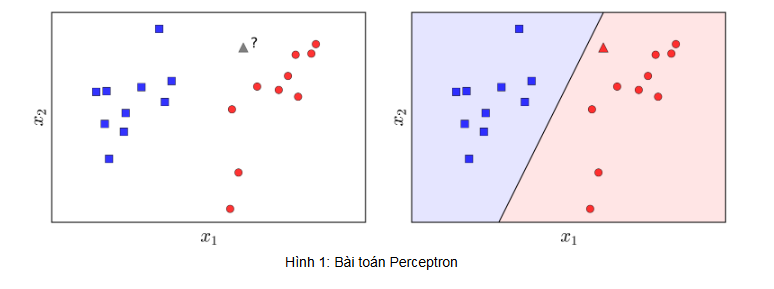

in another word, we should find the territory border for each class. So for each new points. we only need to see where it lays to classify them.

- firstly, we should find the boundaries between the classes. and the simplest boundary in a 2-dimension is a straight line. in a 3-dimension is a flat surface, and so on.


 these boundaries can be given as simple for it can be describes in mathematical equations, or linear. However, we are prototyping that there exists a flat surface to segregate the territory of the two classes



For instance, $X_i = [x_1, x_2,..., x_N]∈R^{d×N}$ is matrix that contains the data points that each rows of $x_i∈R^{d×1}$ is a point of data for a d-dimension

for the results of the boundaries function $Y_i = [y_1, y_2,...,y_N]∈R^{d×N}$, $y_i=1$ if $x_1$ related to class 1 (the blue sector from the previous example) and $y_1 = -1$ if $x_i$ related to class 2 (the red sector from the previous example)


at a certain points of a whole data, we have this functions as the boundary line of the data:
$$
f_w(x) = w_1x_1 + ... + w_dx_d + w_o =w^Tx̂ = 0
$$